In [6]:
import numpy as np
import pandas as pd
from pandas import Series ,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [7]:
df_mpg=pd.read_csv('auto-mpg.data.txt',delim_whitespace=True, header=None)

In [8]:
df_mpg.columns=["mpg",'cylinders','displacement','horsepower','weight','accelaration','model year','origin','car name']

In [9]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
accelaration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:

df_mpg['horsepower'].replace('?', np.nan, inplace=True)
df_mpg.apply(lambda x: sum(x.isnull().values), axis = 0) 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
accelaration    0
model year      0
origin          0
car name        0
dtype: int64

In [12]:
df_mpg[df_mpg.horsepower.isnull()]


,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [13]:
#df_mpg[df_mpg['car name']=='ford pinto']`


In [18]:
df_mpg['horsepower'] = df_mpg['horsepower'].apply(pd.to_numeric)

In [19]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
accelaration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [20]:
df_mpg[df_mpg['cylinders']==4].horsepower.dropna().mean()

78.28140703517587

In [21]:
df_mpg['horsepower'].fillna(78.28,inplace=True)

In [22]:
df_mpg.apply(lambda x: sum(x.isnull().values), axis = 0) 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
accelaration    0
model year      0
origin          0
car name        0
dtype: int64

In [23]:
df=df_mpg.drop(['car name','model year','origin'],axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,accelaration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


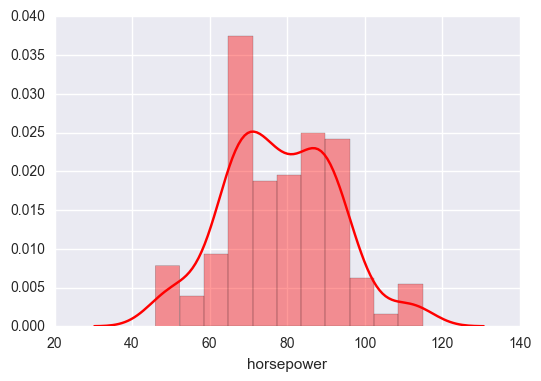

In [26]:
sns.distplot(df[df['cylinders']==4].horsepower,kde = True,color='red')

In [27]:
train=df.sample(n=260)

In [28]:
rem = df[~df.index.isin(train.index)]

In [29]:
validate=rem.sample(n=58)
#validation set

In [30]:
test=rem[~rem.index.isin(validate.index)]
#test

# Analysing using Visualization

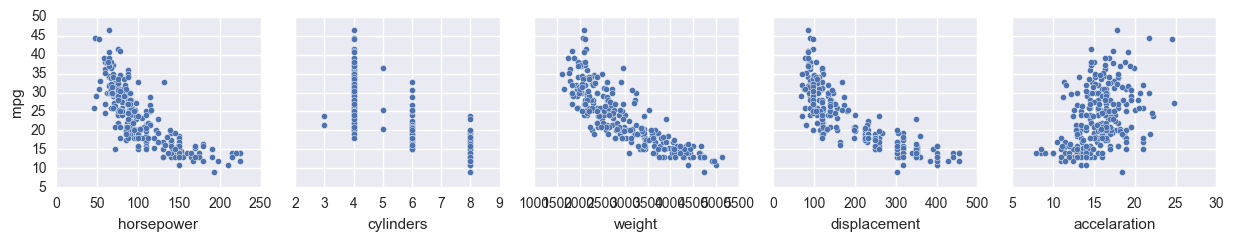

In [31]:
sns.pairplot(data=train, x_vars=['horsepower','cylinders','weight','displacement','accelaration'],  y_vars=['mpg'],
              kind = 'scatter')

In [32]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,accelaration
mpg,1.000000,-0.775396,-0.804203,-0.774678,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.842827,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.896916,0.932824,-0.543684
horsepower,-0.774678,0.842827,0.896916,1.000000,0.863283,-0.688425
weight,-0.831741,0.896017,0.932824,0.863283,1.000000,-0.417457
accelaration,0.420289,-0.505419,-0.543684,-0.688425,-0.417457,1.000000


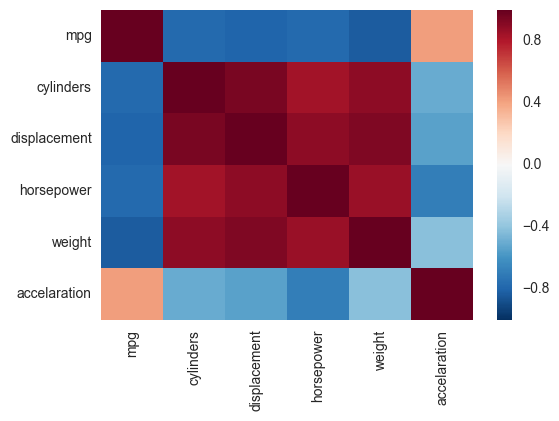

In [33]:
sns.heatmap(df.corr())

inference:   cylinder is a good predictor of origin   and 
Horsepower cylinder and weight follow a similar curve(a little nonlinear) wrt mpg suggesting  a linear regression of with 
there are two data points in mpg~cylinder (cylinder=5)  which may be serving as outlier,but since data is randomly sampled other sets may contain cylinder value =5 so to fit the test data set we must not remove these two points.

# Model Implementation

In [34]:
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer ,mean_squared_error , r2_score
linreg=linear_model.LinearRegression()
X_train = train.drop(['mpg'],axis=1)
X_validate= validate.drop(['mpg'],axis=1)
Y_train=train['mpg']
Y_validate=validate['mpg']

In [35]:
X_test = test.drop(['mpg'],axis=1)
Y_test=test['mpg']

## 1.Without Cross Validation

##        Linear Regression

In [36]:
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
Y_pred=linreg.predict(X_validate)
acc_linreg = np.sqrt(mean_squared_error(Y_validate,Y_pred))
print acc_linreg
print r2_score(Y_validate,Y_pred)


4.2727692464
0.729378043077


## Polynomial Regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polreg = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
polreg.fit(X_train, Y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

In [98]:
polreg_pred=polreg.predict(X_validate)
acc_poly = np.sqrt(mean_squared_error(Y_validate,polreg_pred))
print acc_poly
print r2_score(Y_validate,polreg_pred)

3.70582092955
0.796430358634


## Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf = clf.fit(X_train,Y_train)

In [100]:
ran_pred=clf.predict(X_validate)
acc_ran = np.sqrt(mean_squared_error(Y_validate,ran_pred))
print acc_ran
print r2_score(Y_validate,ran_pred)

3.47314301661
0.821190954048


## SupportVector Regression

In [101]:
#from sklearn.svm import SVR
#svmreg= SVR(kernel='poly',degree=3)
#svmreg = svmreg.fit(X_train,Y_train)

In [102]:
#svr_pred=svmreg.predict(X_validate)
#acc_svr = np.sqrt(mean_squared_error(Y_validate,svr_pred))
#acc_svr

## KNN Regressor

In [103]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh = neigh.fit(X_train, Y_train)

In [104]:
knn_pred=neigh.predict(X_validate)
acc_ran = np.sqrt(mean_squared_error(Y_validate,ran_pred))
print acc_ran
print r2_score(Y_validate,knn_pred)

3.47314301661
0.739522250797


# Gradient Boosting Regressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor(n_estimators=100)
grb=grb.fit(X_train,Y_train)

In [106]:
grb_pred = grb.predict(X_validate)
print np.sqrt(mean_squared_error(Y_validate,grb_pred))
print r2_score(Y_validate,grb_pred)

3.7070021659
0.796300561654


## With Cross Validation

In [107]:
x_crossval = pd.concat([X_train,X_validate])
y_crossval = pd.concat([Y_train,Y_validate])

In [108]:
score1 = cross_val_score(linreg,x_crossval,y_crossval,cv=5,scoring='mean_squared_error')
score2 = cross_val_score(polreg,x_crossval,y_crossval,cv=5,scoring='mean_squared_error')
score3 = cross_val_score(clf,x_crossval,y_crossval,cv=5,scoring='mean_squared_error')
score4 = cross_val_score(neigh,x_crossval,y_crossval,cv=5,scoring='mean_squared_error')
print score1
print score2
print score3
print score4

[-15.51853646 -18.73654965 -18.18822985 -21.76038664 -17.46034466]
[-27.3741353  -14.71999679 -17.42462497 -14.3508084  -13.20923846]
[-18.12101719 -13.26345    -15.42523594 -19.62067143 -14.5736877 ]
[-16.8437375  -19.60970625 -16.6492     -22.1676     -17.12020952]


# Cross validation Tuning

## Random Forest

In [109]:
from sklearn.grid_search import GridSearchCV
parameters = {'n_estimators':[10,20,30,40,50,100], 'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,2,3,5,10]}
randf = RandomForestRegressor()
cvrandf= GridSearchCV(randf, parameters)
cvrandf = cvrandf.fit(X_train,Y_train)

In [110]:
cvrandf_pred=cvrandf.predict(X_validate)
acc_cvrandf = np.sqrt(mean_squared_error(Y_validate,cvrandf_pred))
print acc_cvrandf
print r2_score(Y_validate,cvrandf_pred)

3.57030460885
0.811046607786


In [111]:
cvrandf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

## Gradient Boosting regressor

In [112]:
parameters={'n_estimators':[10,50,100,150,200] , 'min_samples_split':[2,3,5,6,10]}
grb1 = GradientBoostingRegressor()
cvgrb = GridSearchCV(grb1,parameters)
cvgrb=cvgrb.fit(X_train,Y_train)

In [113]:
cvgrb_pred = cvgrb.predict(X_validate)
acc_cvgrb = np.sqrt(mean_squared_error(Y_validate,cvgrb_pred))
print acc_cvgrb
print r2_score(Y_validate,cvgrb_pred)
cvgrb.best_params_

3.55734016158
0.812416366919


{'min_samples_split': 6, 'n_estimators': 50}

## KNN

In [114]:
parameters = {'n_neighbors':range(1,5)}
knn1 = KNeighborsRegressor()
cvknn = GridSearchCV(knn1, parameters)
cvknn = cvknn.fit(X_train,Y_train)

In [115]:
cvknn_pred=cvknn.predict(X_validate)
acc_cvknn = np.sqrt(mean_squared_error(Y_validate,cvknn_pred))
print acc_cvknn
print r2_score(Y_validate,cvknn_pred)
cvknn.best_params_



4.31811790499
0.72360311458


{'n_neighbors': 4}

## Lasso 

In [116]:
#lasso=linear_model.Lasso()

In [117]:
#parameters = {'alpha':np.arange(0,2,0.2)}
#classo = GridSearchCV(lasso, parameters)
#classo.fit(X_train,Y_train)
#classo_pred=classo.predict(X_validate)
#acc_classo=np.sqrt(mean_squared_error(Y_validate,classo_pred))
#print acc_classo
#print r2_score(Y_validate,classo_pred)


# Using Inference from correlation

In [118]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,accelaration
mpg,1.000000,-0.775396,-0.804203,-0.774678,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.842827,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.896916,0.932824,-0.543684
horsepower,-0.774678,0.842827,0.896916,1.000000,0.863283,-0.688425
weight,-0.831741,0.896017,0.932824,0.863283,1.000000,-0.417457
accelaration,0.420289,-0.505419,-0.543684,-0.688425,-0.417457,1.000000


 cylinder -  displacement
 /weight    -  displacement
 

In [119]:
newX_train = train.drop(['mpg','displacement'],axis=1)
newX_validate= validate.drop(['mpg','displacement'],axis=1)
Y_train=train['mpg']
Y_validate=validate['mpg']

## Polynomial Regression

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
newpolreg = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
newpolreg.fit(newX_train, Y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

In [121]:
newpolreg_pred=newpolreg.predict(newX_validate)
print r2_score(Y_validate,newpolreg_pred)



0.802516599758


## Random Forest

In [122]:

newrandf = RandomForestRegressor(max_features=2,n_estimators=40,min_samples_leaf=2)
newrandf = newrandf.fit(newX_train,Y_train)
newrandf_pred=newrandf.predict(newX_validate)
print r2_score(Y_validate,newrandf_pred)




0.789632698245


# Conclusion

## we can use random forest /gradient boosting as a regressor for our problem on test set

### with parameters which we obtained during crossvalidation 